In [1]:
import backtrader as bt
import os
import datetime

from data.tushare_data import *
from strategy.AceStrategy import *
from strategy.KDJStrategy import *
from commission.ChinaStockDuty import *


In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
%matplotlib inline 

In [3]:
ts_code = '600036.SH'
raw_data = get_from_csv(ts_code)

               open     high      low    close      volume  openinterest
trade_date                                                              
2002-04-09   2.0767   2.1498   2.0767   2.1063  4141088.31           0.0
2002-04-10   2.1063   2.1142   2.0530   2.0944   679454.75           0.0
2002-04-11   2.0944   2.1103   2.0727   2.0786   227882.55           0.0
2002-04-12   2.0747   2.1024   2.0707   2.0885   212564.63           0.0
2002-04-15   2.0885   2.0944   2.0451   2.0530   185311.04           0.0
...             ...      ...      ...      ...         ...           ...
2021-03-02  50.8600  50.9000  49.0100  49.5500  1007786.21           0.0
2021-03-03  50.0000  52.9800  49.6000  52.7700  1315933.15           0.0
2021-03-04  52.1900  53.8800  52.0000  52.4000   833039.04           0.0
2021-03-05  51.9000  52.3900  50.1100  51.4000   735195.85           0.0
2021-03-08  51.5900  51.9800  49.7000  49.9300   698137.59           0.0

[4520 rows x 6 columns]
——————————————————————————

In [4]:
cerebro = bt.Cerebro(stdstats=False)
cerebro.broker.set_cash(100000.00)  # 设置初始资金金额

In [5]:
data = bt.feeds.PandasData(dataname=raw_data,
                           fromdate=datetime.datetime(2010, 1, 1),
                           todate=datetime.datetime(2021, 3, 8),
                           #datetime='trade_date'
                          )


cerebro.adddata(data)

In [6]:
cerebro.addstrategy(KDJStrategy)

0

In [7]:
cerebro.addobserver(bt.observers.Broker)
cerebro.addobserver(bt.observers.Trades)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.DrawDown)
cerebro.addobserver(bt.observers.Value)
cerebro.addobserver(bt.observers.TimeReturn)

In [8]:
cerebro.addanalyzer(bt.analyzers.PyFolio)

In [9]:
chinastockcomm = ChinaStockDutyCommissionScheme(stamp_duty=0.00025,commission=0.001)
cerebro.broker.addcommissioninfo(chinastockcomm)

In [10]:
start_value = cerebro.broker.getvalue()
print(f'初始资金:{start_value}')

results = cerebro.run()

end_value =  cerebro.broker.getvalue()
print(f'期末资金:{end_value}')

初始资金:100000.0
期末资金:105340.67462500007


<IPython.core.display.Javascript object>


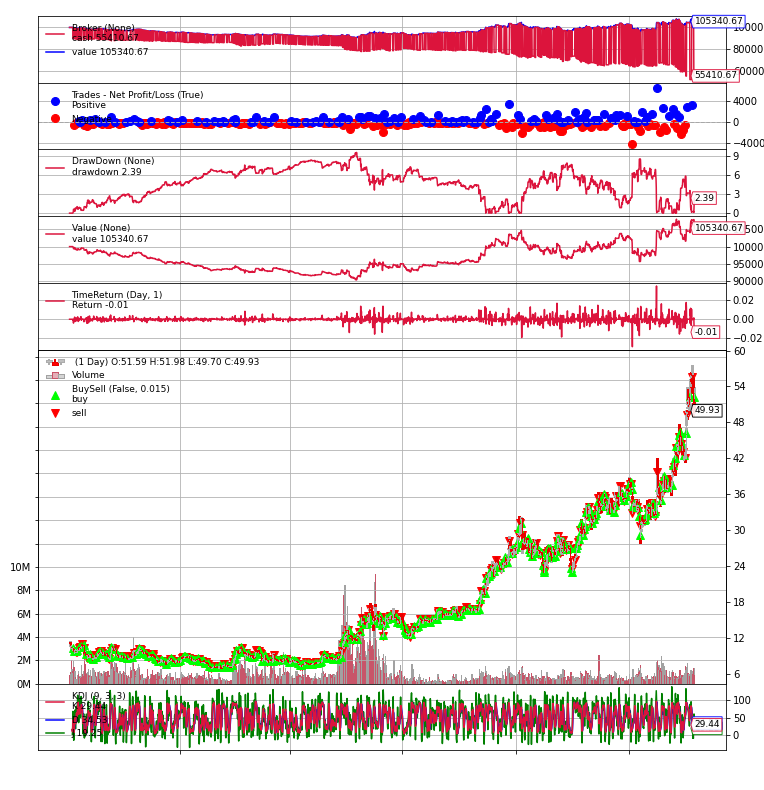

[[<Figure size 432x288 with 8 Axes>]]

In [11]:
cerebro.plot(style = "candle")

### 分开两段跑，不然上面的图没法手动操作。

In [12]:
strat = results[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()

/home/marstao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
/home/marstao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


Start date,2010-01-04
End date,2021-03-08
Total months,128
,Backtest
Annual return,0.488%
Cumulative returns,5.341%
Annual volatility,4.346%
Sharpe ratio,0.13
Calmar ratio,0.05
Stability,0.28
Max drawdown,-9.638%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,9.64,2010-01-22,2015-03-10,2017-06-27,1938
1,8.61,2018-02-05,2020-03-17,2020-08-11,657
2,5.89,2020-11-11,2021-01-06,NaT,NaN
3,2.29,2020-08-17,2020-09-11,2020-10-15,44
4,2.23,2017-08-25,2017-11-02,2017-11-20,62


Stress Events,mean,min,max
US downgrade/European Debt Crisis,-0.03%,-0.25%,0.27%
EZB IR Event,0.01%,-0.10%,0.25%
Flash Crash,-0.15%,-0.43%,0.03%


Top 10 long positions of all time,max
Data0,51.68%


Top 10 short positions of all time,max


Top 10 positions of all time,max
Data0,51.68%


/home/marstao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pyfolio/round_trips.py:309: RuntimeWarning: divide by zero encountered in true_divide
  ending_price = ending_val / ending_amount
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


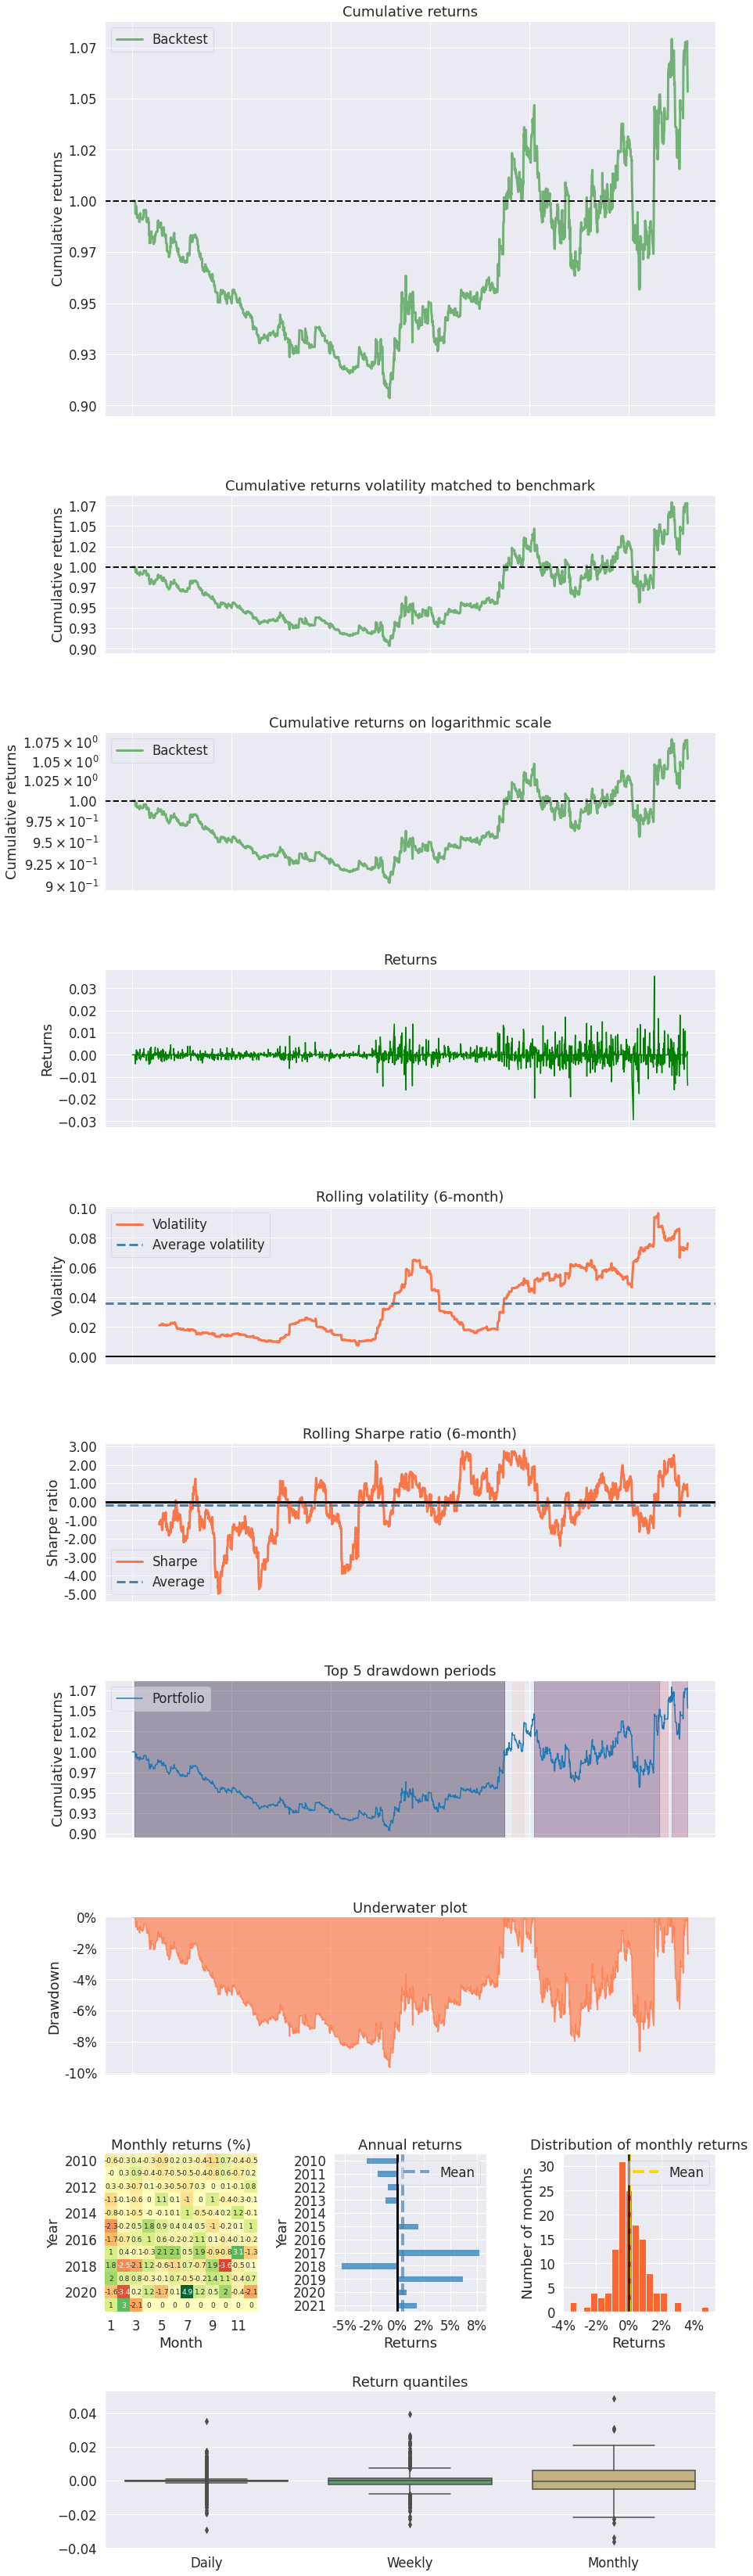

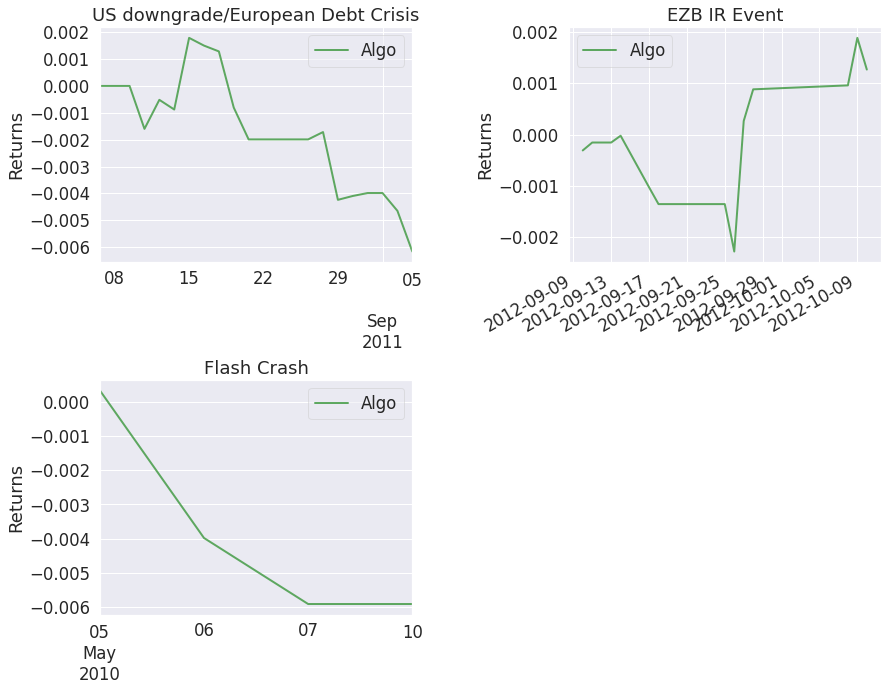

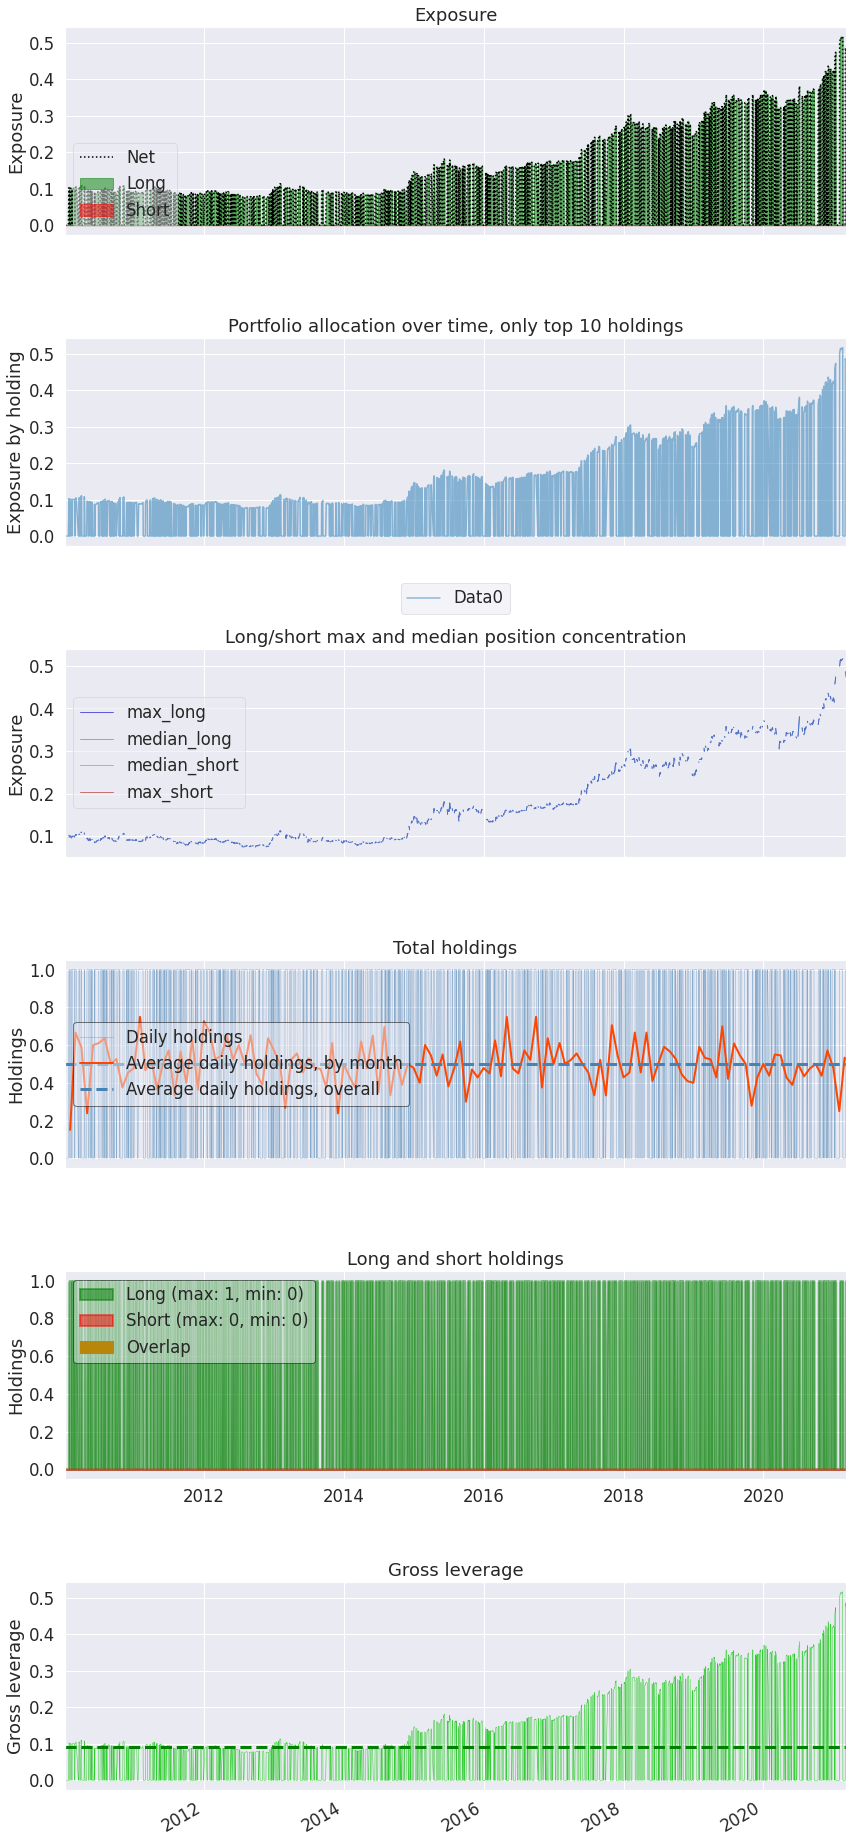

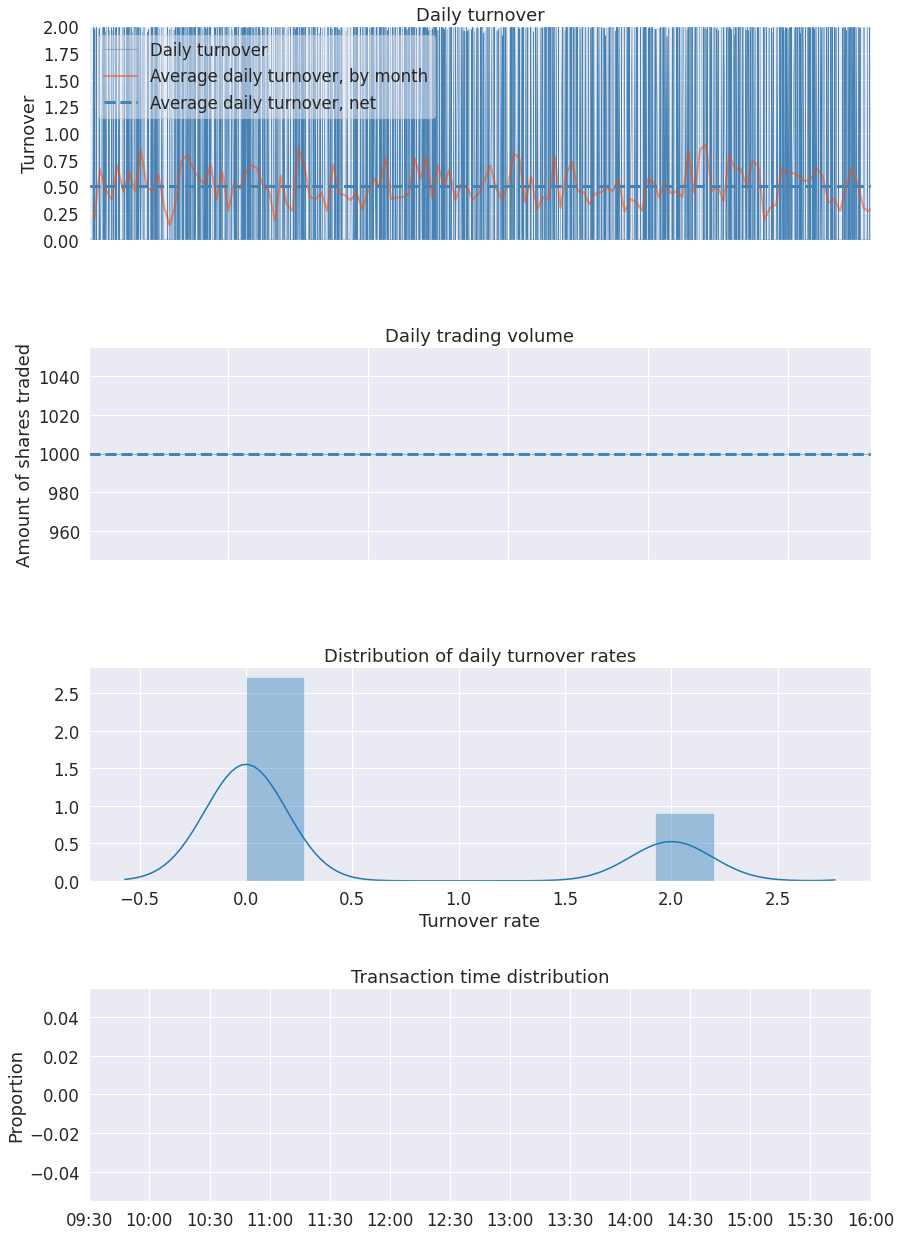

In [13]:
import pyfolio as pf
%matplotlib inline

try:
    pf.create_full_tear_sheet(
        returns=returns,
        positions=positions,
        transactions=transactions,
        #gross_lev=gross_lev,
        #live_start_date='2010-01-04',  # This date is sample specific
        round_trips=True
        )
except :
    pass